In [1]:
import tensorflow as tf

In [2]:
print('TensorFlow version:{}'.format(tf.__version__))

TensorFlow version:2.3.1


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# 面向对象路径管理工具
import pathlib 

In [4]:
data_dir = './dataset/2_class'

In [5]:
# 构建路径对象
data_root = pathlib.Path(data_dir)

In [6]:
data_root

WindowsPath('dataset/2_class')

In [7]:
# iterdir:对目录进行迭代
for item in data_root.iterdir():
    print(item)

dataset\2_class\airplane
dataset\2_class\lake


In [8]:
# 提取所有路径
all_image_path = list(data_root.glob('*/*')) # 所有目录中的所有文件 

In [9]:
len(all_image_path)

1400

In [10]:
# 查看前三张
all_image_path[0:3]

[WindowsPath('dataset/2_class/airplane/airplane_001.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_002.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_003.jpg')]

In [11]:
# 查看最后三张
all_image_path[-3:]

[WindowsPath('dataset/2_class/lake/lake_698.jpg'),
 WindowsPath('dataset/2_class/lake/lake_699.jpg'),
 WindowsPath('dataset/2_class/lake/lake_700.jpg')]

In [12]:
# 将WindowsPath格式的地址转为str类型的
all_image_path = [str(path) for path in all_image_path]

In [13]:
all_image_path[10:12]

['dataset\\2_class\\airplane\\airplane_011.jpg',
 'dataset\\2_class\\airplane\\airplane_012.jpg']

In [14]:
import random

In [15]:
random.shuffle(all_image_path)

In [16]:
all_image_path[10:12]

['dataset\\2_class\\lake\\lake_129.jpg',
 'dataset\\2_class\\airplane\\airplane_411.jpg']

In [17]:
image_count = len(all_image_path)
image_count

1400

In [18]:
# 获取分类名称
label_names = sorted(item.name for item in data_root.glob('*/')) # 提取所有目录名
label_names

['airplane', 'lake']

In [19]:
# 为分类进行自动编码
label_to_index =dict((name,index) for index,name in enumerate(label_names))

In [20]:
label_to_index

{'airplane': 0, 'lake': 1}

In [21]:
# 取出图片的上一级路径名为它的label
pathlib.Path('dataset/2_class/lake/lake_700.jpg').parent.name

'lake'

In [22]:
# 将所有的图片与它对应的标签序号对应
all_image_label = [label_to_index[pathlib.Path(p).parent.name] for p in all_image_path]

In [23]:
all_image_label[:5]

[0, 1, 0, 1, 0]

In [24]:
all_image_path[:5]

['dataset\\2_class\\airplane\\airplane_520.jpg',
 'dataset\\2_class\\lake\\lake_367.jpg',
 'dataset\\2_class\\airplane\\airplane_461.jpg',
 'dataset\\2_class\\lake\\lake_053.jpg',
 'dataset\\2_class\\airplane\\airplane_374.jpg']

In [25]:
# 引入显示图片
import IPython.display as display

In [26]:
# 构造（序号：标签）字典
index_to_label = dict((value,key) for key,value in label_to_index.items())
index_to_label

{0: 'airplane', 1: 'lake'}

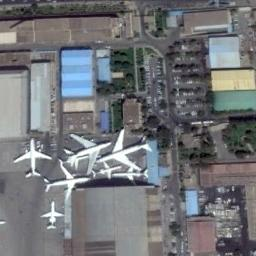

airplane



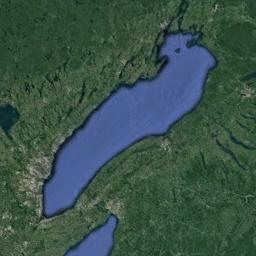

lake



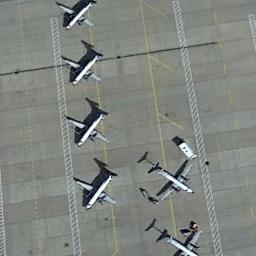

airplane



In [27]:
# 随机选择三张图片进行显示
for n in range(3): 
    image_index = random.choice(range(len(all_image_path))) # 从all_image_path的长度中随机选择一个数字
    display.display(display.Image(all_image_path[image_index])) # 显示图片
    print(index_to_label[all_image_label[image_index]]) # 显示图片对应label
    print()

In [28]:
img_path = all_image_path[0]
img_path

'dataset\\2_class\\airplane\\airplane_520.jpg'

In [29]:
# 使用tensorflow的方法读取图片(二进制形式
img_raw = tf.io.read_file(img_path)
img_raw

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc

In [30]:
# 对图片数据进行解码
img_tensor = tf.image.decode_image(img_raw)
img_tensor.shape

TensorShape([256, 256, 3])

In [31]:
img_tensor.dtype

tf.uint8

In [32]:
# 数据类型转换：uint8->float
img_tensor = tf.cast(img_tensor,tf.float32)

In [33]:
# 数据标准化：归一化
img_tensor = img_tensor/255

In [34]:
img_tensor.numpy()

array([[[0.4862745 , 0.44313726, 0.43529412],
        [0.48235294, 0.4392157 , 0.43137255],
        [0.48235294, 0.4392157 , 0.43137255],
        ...,
        [0.49019608, 0.44705883, 0.4392157 ],
        [0.49411765, 0.4509804 , 0.44313726],
        [0.5058824 , 0.4627451 , 0.45490196]],

       [[0.48235294, 0.4392157 , 0.43137255],
        [0.47843137, 0.43529412, 0.42745098],
        [0.47843137, 0.43529412, 0.42745098],
        ...,
        [0.49019608, 0.44705883, 0.4392157 ],
        [0.49803922, 0.45490196, 0.44705883],
        [0.5058824 , 0.4627451 , 0.45490196]],

       [[0.48235294, 0.4392157 , 0.43137255],
        [0.47843137, 0.43529412, 0.42745098],
        [0.4745098 , 0.43137255, 0.42352942],
        ...,
        [0.49411765, 0.4509804 , 0.44313726],
        [0.49803922, 0.45490196, 0.44705883],
        [0.5019608 , 0.45882353, 0.4509804 ]],

       ...,

       [[0.45882353, 0.41568628, 0.43137255],
        [0.45882353, 0.41568628, 0.43137255],
        [0.4627451 , 0

In [35]:
img_tensor.numpy().max()

1.0

In [36]:
img_tensor.numpy().min()

0.25882354

In [37]:
# 加载和预处理函数：读取、解码、类型转换、标准化
def load_preprosess_img(path):
    # 使用tensorflow的方法读取图片(二进制形式
    img_raw = tf.io.read_file(img_path)
    # 对图片数据进行解码
    img_tensor = tf.image.decode_jpeg(img_raw,channels=3)
    # 改变图像大小的方法。此处无实际作用，只是告诉tensorflow图片的大小
    img_tensor = tf.image.resize(img_tensor,[256,256])
    # 数据类型转换：uint8->float
    img_tensor = tf.cast(img_tensor,tf.float32)
    # 数据标准化：归一化
    img = img_tensor/255
    return img

In [38]:
image_path = all_image_path[5]

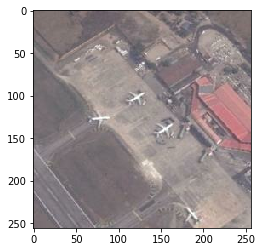

In [39]:
plt.imshow(load_preprosess_img(image_path))

In [40]:
# 构建地址dataset
path_ds = tf.data.Dataset.from_tensor_slices(all_image_path)
path_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [41]:
# 通过对每一个元素进行load_preprosess_img变化的得到一个新的dataset
image_dataset = path_ds.map(load_preprosess_img) 

In [42]:
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [43]:
# 构造标签dataset
label_dataset = tf.data.Dataset.from_tensor_slices(all_image_label)

In [44]:
for label in label_dataset.take(10):
    print(label.numpy())

0
1
0
1
0
0
1
0
1
0


In [45]:
dataset = tf.data.Dataset.zip((image_dataset,label_dataset))
dataset

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [46]:
# 划分训练数据和测试数据
test_count = int(image_count*0.2)
train_count = image_count - test_count
test_count,train_count

(280, 1120)

In [47]:
# 跳过test_count张数据，剩下的作为训练数据
train_dataset = dataset.skip(test_count) 

In [48]:
test_dataset = dataset.take(test_count)

In [49]:
train_dataset

<SkipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [50]:
BATCH_SIZE = 32

In [51]:
# 将训练数据集进行乱序、重复和分批次
train_dataset = train_dataset.repeat().shuffle(train_count).batch(BATCH_SIZE)

In [52]:
train_dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [53]:
test_dataset = test_dataset.batch(BATCH_SIZE)

建立模型(增加BN层)

In [59]:
model = tf.keras.Sequential() # 顺序模型
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape = (256,256,3)))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.Conv2D(64,(3,3)))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128,(3,3)))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.Conv2D(128,(3,3)))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256,(3,3)))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.Conv2D(256,(3,3)))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512,(3,3)))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.Conv2D(512,(3,3)))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(1024,(3,3)))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.Dense(256))
model.add(tf.kears.layers.BatchNormalization()) # 批标准化层
model.add(tf.keras.layers.Activation('relu')) # 激活层

model.add(tf.keras.layers.Dense(1,activation='sigmoid')) # 二分类问题，逻辑回归问题

AttributeError: module 'tensorflow' has no attribute 'kears'

In [ ]:
model.summary()

In [56]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc']
)

In [57]:
steps_per_epoch = train_count//BATCH_SIZE
validation_steps = test_count//BATCH_SIZE

In [58]:
history = model.fit(train_dataset,epochs = 30,steps_per_epoch = steps_per_epoch,validation_data=test_dataset,validation_steps = validation_steps)

Epoch 1/30
35/35 [==============================] - 1312s 37s/step - loss: 0.6953 - acc: 0.5036 - val_loss: 0.6934 - val_acc: 0.4961
Epoch 2/30
35/35 [==============================] - 1037s 30s/step - loss: 0.6932 - acc: 0.5063 - val_loss: 0.6933 - val_acc: 0.4961
Epoch 3/30
35/35 [==============================] - 1045s 30s/step - loss: 0.6935 - acc: 0.4884 - val_loss: 0.6932 - val_acc: 0.4961
Epoch 4/30
35/35 [==============================] - 1018s 29s/step - loss: 0.6932 - acc: 0.4812 - val_loss: 0.6931 - val_acc: 0.5039
Epoch 5/30
35/35 [==============================] - 1024s 29s/step - loss: 0.6933 - acc: 0.4857 - val_loss: 0.6931 - val_acc: 0.5039
Epoch 6/30
35/35 [==============================] - 1024s 29s/step - loss: 0.6934 - acc: 0.4804 - val_loss: 0.6932 - val_acc: 0.4961
Epoch 7/30
35/35 [==============================] - 1014s 29s/step - loss: 0.6932 - acc: 0.4902 - val_loss: 0.6931 - val_acc: 0.5039
Epoch 8/30
35/35 [==============================] - 1019s 29s/step - 

In [60]:
train_dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [61]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

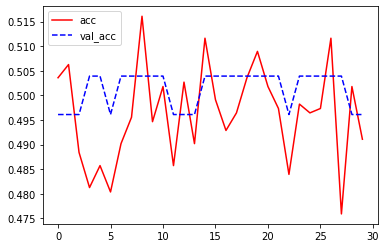

In [62]:
plt.plot(history.epoch,history.history.get('acc'),'r',label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),'b--',label='val_acc')
plt.legend()

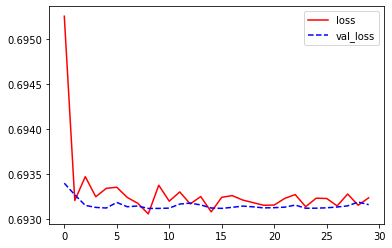

In [63]:
plt.plot(history.epoch,history.history.get('loss'),'r',label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),'b--',label='val_loss')
plt.legend()